In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y


In [3]:
X, y = load_planar_dataset()
print(y.shape)

(1, 400)


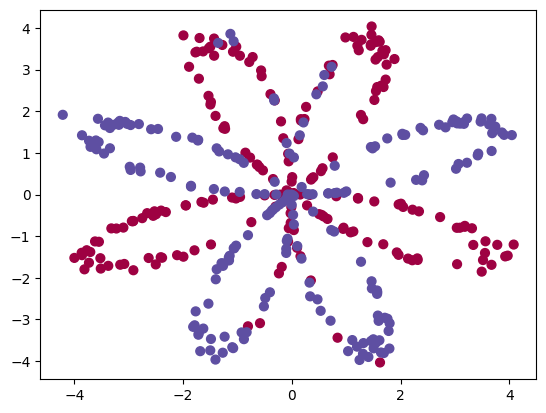

In [4]:
plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral)

In [5]:
def sigmoid(z):
  s = 1 / (1 + np.exp(-z))
  return s

def initialize_params(in_feature, out_feature):
  w = np.random.randn(out_feature, in_feature) * 0.01
  b = np.zeros((out_feature,1))
  return w, b

def forward_prop(X, params):
  W1 = params["W1"]
  W2 = params["W2"]
  W3 = params["W3"]
  b1 = params["b1"]
  b2 = params["b2"]
  b3 = params["b3"]

  Z1 = np.dot(W1, X) + b1
  Z2 = np.dot(W2, Z1) + b2
  A2 = np.tanh(Z2)
  Z3 = np.dot(W3, A2) + b3
  A3 = sigmoid(Z3)
  cache = (Z1, Z2, Z3, A2)
  return A3, cache

def backprop(X, y, y_predict, params, cache):
  W1 = params["W1"]
  W2 = params["W2"]
  W3 = params["W3"]

  Z1, Z2, Z3, A2 = cache

  n = y.shape[1]

  dZ3 = y_predict - y
  dW3 = (1/n) * np.dot(dZ3, A2.T)
  db3 =  (1/n) * np.sum(dZ3, axis=1, keepdims=True)
  dZ2 = np.dot(W3.T, dZ3) * (1 - np.power(A2,2))
  dW2 = (1/n) * np.dot(dZ2, Z1.T)
  db2 = (1/n) * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.dot(W2.T, dZ2)
  dW1 = (1/n) * np.dot(dZ1, X.T)
  db1 = (1/n) * np.sum(dZ1, axis=1, keepdims=True)

  grads = {
      "dW1": dW1,
      "dW2": dW2,
      "dW3": dW3,
      "db1": db1,
      "db2": db2,
      "db3": db3
  }

  return grads

def gradient_descent(params, grads, lr):
  W1 = params["W1"]
  W2 = params["W2"]
  W3 = params["W3"]
  b1 = params["b1"]
  b2 = params["b2"]
  b3 = params["b3"]

  dW1 = grads["dW1"]
  dW2 = grads["dW2"]
  dW3 = grads["dW3"]
  db1 = grads["db1"]
  db2 = grads["db2"]
  db3 = grads["db3"]

  W1 -= lr * dW1
  W2 -= lr * dW2
  W3 -= lr * dW3
  b1 -= lr * db1
  b2 -= lr * db2
  b3 -= lr * db3

  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2,
                "W3": W3,
                "b3": b3}

  return parameters

def train(X, y, epochs, lr):
  W1, b1 = initialize_params(X.shape[0], 10)
  W2, b2 = initialize_params(10, 10)
  W3, b3 = initialize_params(10, y.shape[0])
  params = {"W1": W1,
            "b1": b1,
            "W2": W2,
            "b2": b2,
            "W3": W3,
            "b3": b3}
  for i in range(epochs):
    y_pred, cache = forward_prop(X, params)
    grads = backprop(X, y, y_pred, params, cache)
    params = gradient_descent(params, grads, lr)

  return params

def predict(parameters, X):
    out, cache = forward_prop(X, parameters)
    predictions = np.where(out > 0.5, True, False)

    return predictions


In [6]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

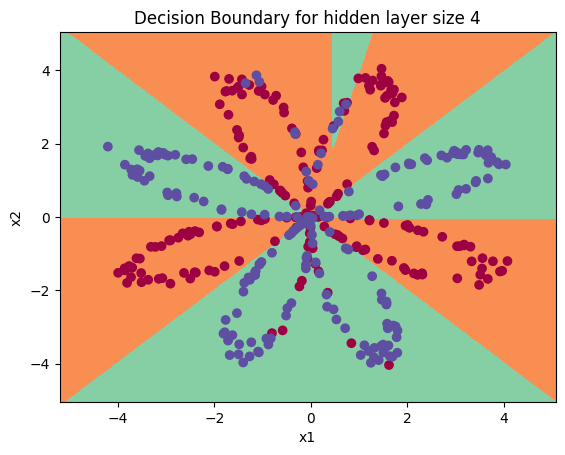

In [7]:
params = train(X, y, 10000, 1.2)
plot_decision_boundary(lambda x: predict(params, x.T), X, y)
plt.title("Decision Boundary for hidden layer size " + str(4))